In [3]:
from os import path
import os
from pprint import pprint

# pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [4]:
characters = pd.read_excel('./datasets/characters.xlsx')
characters.head()

,Unnamed: 0,id,special,name_en,name_ko,image_icon,image_photo,image_house,species,gender,...,personality,personality_subtype,hobby,catchphrase,favorite_song,favorite_saying,styles,colors,tier,rank
0,0,admiral,False,Admiral,일섭,https://acnhcdn.com/latest/NpcIcon/brd06.png,https://acnhcdn.com/latest/NpcBromide/NpcNmlBr...,https://acnhcdn.com/drivesync/render/houses/br...,새,Male,...,무뚝뚝,A,자연,aye aye,Steep Hill,Only quitters give up.,[None],"[None, None]",6.0,89.0
1,1,agents,False,Agent S,2호,https://acnhcdn.com/latest/NpcIcon/squ05.png,https://acnhcdn.com/latest/NpcBromide/NpcNmlSq...,https://acnhcdn.com/drivesync/render/houses/sq...,다람쥐,Female,...,아이돌,B,운동,sidekick,Go K.K. Rider,You gotta put the pedal to the metal!,"[None, None]","[None, None]",6.0,45.0
2,2,agnes,False,Agnes,아그네스,https://acnhcdn.com/latest/NpcIcon/pig17.png,https://acnhcdn.com/latest/NpcBromide/NpcNmlPi...,https://acnhcdn.com/drivesync/render/houses/pi...,돼지,Female,...,단순 활발,A,놀이,snuffle,K.K. House,You reap what you sow.,"[None, None]","[None, None]",4.0,26.0
3,3,al,False,Al,우락,https://acnhcdn.com/latest/NpcIcon/gor08.png,https://acnhcdn.com/latest/NpcBromide/NpcNmlGo...,https://acnhcdn.com/drivesync/render/houses/go...,고릴라,Male,...,먹보,B,운동,ayyyeee,Go K.K. Rider,Life is a buffet. Always go back for seconds.,[None],"[None, None]",6.0,19.0
4,4,alfonso,False,Alfonso,알베르트,https://acnhcdn.com/latest/NpcIcon/crd00.png,https://acnhcdn.com/latest/NpcBromide/NpcNmlCr...,https://acnhcdn.com/drivesync/render/houses/cr...,악어,Male,...,먹보,B,놀이,it'sa me,Forest Life,Slow and steady wins the race.,[None],"[None, None]",6.0,6.0


# Gender

In [4]:
gender = characters.groupby('gender').size().reset_index(name='gender_counts')
gender

,gender,gender_counts
0,Female,208
1,Male,243


In [5]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# species

In [6]:
species = characters.groupby('species').size().reset_index(name='species_counts')
species_val = species['species'].values
species_val

array(['개', '개구리', '개미핥기', '고릴라', '고양이', '곰', '꼬마곰', '늑대', '다람쥐', '닭',
       '독수리', '돼지', '말', '문어', '사슴', '사자', '새', '수소', '악어', '암소', '양',
       '염소', '오리', '원숭이', '쥐', '캥거루', '코끼리', '코뿔소', '코알라', '타조', '토끼',
       '펭귄', '하마', '햄스터', '호랑이'], dtype=object)

In [7]:
species = characters.groupby('species').size().reset_index(name='species_counts')
species_val = species['species_counts'].values
species_val

array([16, 18,  7,  9, 23, 15, 16, 11, 18,  9,  9, 15, 15,  3, 10,  7, 13,
        6,  7,  4, 13,  8, 17,  8, 15,  8, 11,  6,  9, 10, 20, 13,  7,  8,
        7], dtype=int64)

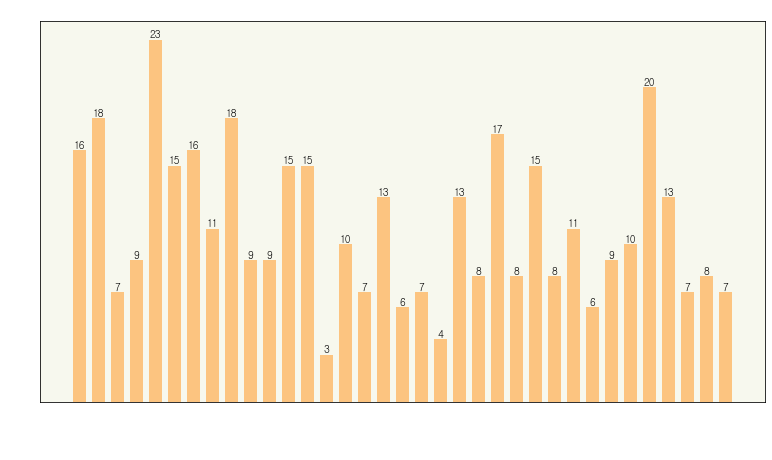

In [9]:
# 동물
fig0, ax0 = plt.subplots(figsize=(13, 7))
plt.title('동물').set_color('white')
plt.xlabel('species').set_color('white')
plt.ylabel('species_counts').set_color('white')
ax0.tick_params(axis='x', colors="white", rotation=40, length=0)
ax0.tick_params(axis='y', colors="white")
ax0.set_facecolor('#F7F8EE')
bar0 = ax0.bar(species['species'], species['species_counts'], color='#FCC480', width=0.7)

for rect in bar0:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.f' % height, ha='center', va='bottom', size = 10)

plt.savefig('./species_chart.png')


## personality

In [26]:
personality = characters.groupby('personality').size().reset_index(name='personality_counts')
personality['personality'].values

array(['느끼함', '단순 활발', '먹보', '무뚝뚝', '성숙함', '아이돌', '운동광', '친절함'],
      dtype=object)

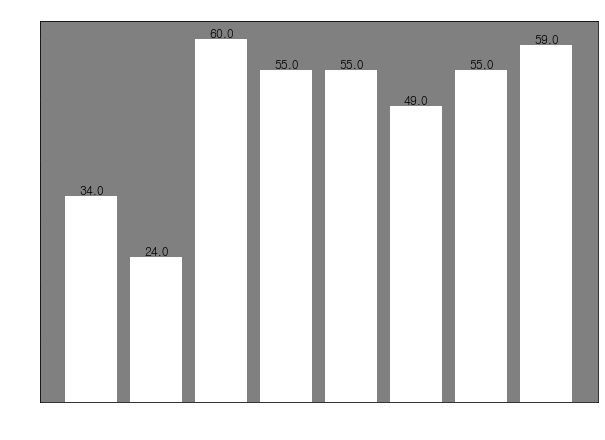

In [15]:
# 성격
fig1, ax1 = plt.subplots(figsize=(10, 7))
plt.title('성격').set_color('white')
plt.xlabel('personality').set_color('white')
plt.ylabel('personality_counts').set_color('white')
ax1.tick_params(axis='x', colors="white")
ax1.tick_params(axis='y', colors="white")
ax1.set_facecolor('grey')
bar1 = ax1.bar(personality['personality'], personality['personality_counts'], color='white')

for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)


# Hobby

In [27]:
hobby = characters.groupby('hobby').size().reset_index(name='hobby_counts')
hobby
hobby['hobby'].values

array(['교육', '놀이', '운동', '음악', '자연', '패션'], dtype=object)

In [52]:
hobby = characters.groupby(['hobby', 'gender']).size().reset_index(name='hobby_counts')
hobby
hobby['hobby_counts'].values

,hobby,gender,hobby_counts
0,교육,Female,32
1,교육,Male,32
2,놀이,Female,16
3,놀이,Male,49
4,운동,Female,12
5,운동,Male,54
6,음악,Female,34
7,음악,Male,30
8,자연,Female,27
9,자연,Male,39


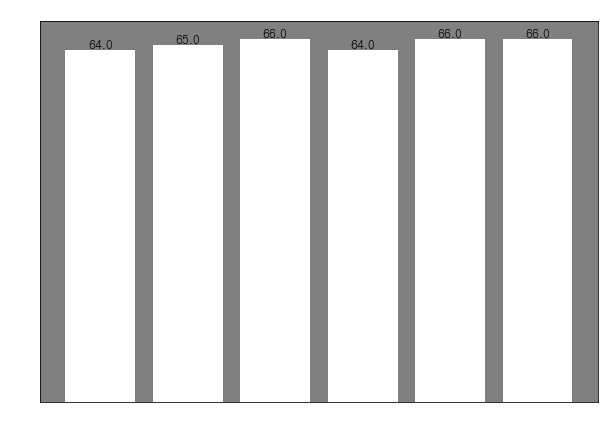

In [17]:
# 취미
fig2, ax2 = plt.subplots(figsize=(10, 7))
plt.title('취미').set_color('white')
plt.xlabel('hobby').set_color('white')
plt.ylabel('hobby_counts').set_color('white')
ax2.tick_params(axis='x', colors="white")
ax2.tick_params(axis='y', colors="white")
ax2.set_facecolor('grey')
bar2 = ax2.bar(hobby['hobby'], hobby['hobby_counts'], color='white')

for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)


# Birthday

In [19]:
# 생일 같은 주민이 있는지 확인 => 존재 (최대 3명까지 겹침. 06-07)
birth = characters.groupby('birthday').size().reset_index(name='counts')
birth
# birth.loc[birth['counts'].idxmax()]

# 생일이 없는 날이 있는지 확인 => 없는 날 04-01

birthday
01-01    1
01-02    2
01-03    1
01-04    1
01-05    1
        ..
12-27    1
12-28    1
12-29    2
12-30    1
12-31    2
Length: 365, dtype: int64

## Birthday MM
생일별 달 분포

In [189]:
birth.birthday.str.split('-').str[0].reset_index(name='month')
birth_month = birth.groupby(birth.birthday.str.split('-').str[0]).size().reset_index(name='month_counts')
birth_month

,birthday,month_counts
0,01,31
1,02,29
2,03,31
3,04,29
4,05,31
5,06,30
6,07,31
7,08,31
8,09,30
9,10,31


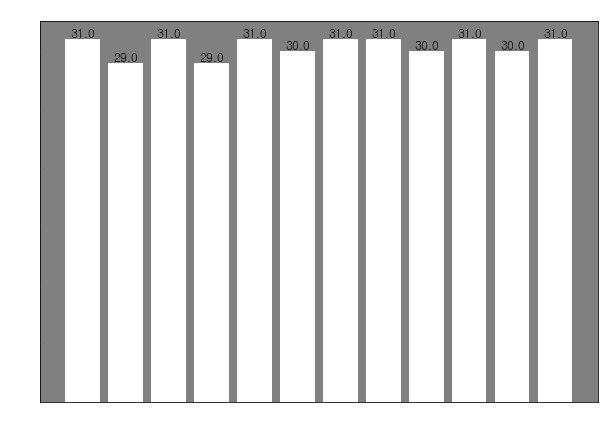

In [191]:
# Birth Month
fig3, ax3 = plt.subplots(figsize=(10, 7))
plt.title('Birth Month').set_color('white')
plt.xlabel('Month').set_color('white')
plt.ylabel('counts').set_color('white')
ax3.tick_params(axis='x', colors="white")
ax3.tick_params(axis='y', colors="white")
ax3.set_facecolor('grey')
bar3 = ax3.bar(birth_month['birthday'], birth_month['month_counts'], color='white')

for rect in bar3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)


## Birthday Day
생일별 일 분포 <br>

In [194]:
# day 비교 => 01 은 11개 04-01이 없음 / 30은 11개 (2월 제외) / 31은 7개 1, 3, 5, 7, 8, 10, 12
birth_day = birth.groupby(birth.birthday.str.split('-').str[1]).size().reset_index(name='day_counts')
birth_day

,birthday,day_counts
0,01,11
1,02,12
2,03,12
3,04,12
4,05,12
5,06,12
6,07,12
7,08,12
8,09,12
9,10,12


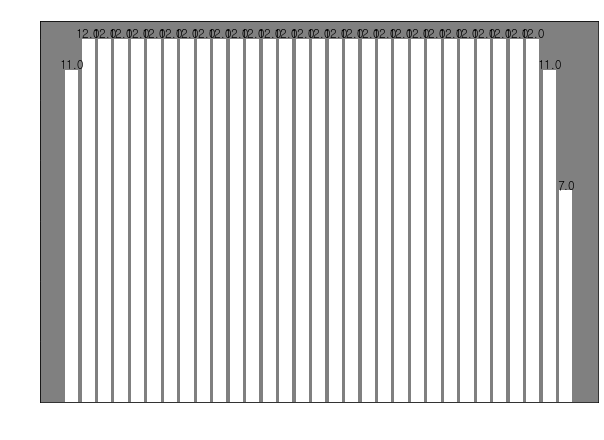

In [195]:
# Birth Day
fig3, ax3 = plt.subplots(figsize=(10, 7))
plt.title('Birth day').set_color('white')
plt.xlabel('Day').set_color('white')
plt.ylabel('counts').set_color('white')
ax3.tick_params(axis='x', colors="white")
ax3.tick_params(axis='y', colors="white")
ax3.set_facecolor('grey')
bar3 = ax3.bar(birth_day['birthday'], birth_day['day_counts'], color='white')

for rect in bar3:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)


# Styles

In [29]:
# Style 1
villagers = pd.read_excel('./datasets/villagers.xlsx')
style1 = villagers.groupby('Style 1').size().reset_index(name='style1_counts')
style1['style1_counts'].values


array([ 50,  68,  63,  54,  38, 118], dtype=int64)

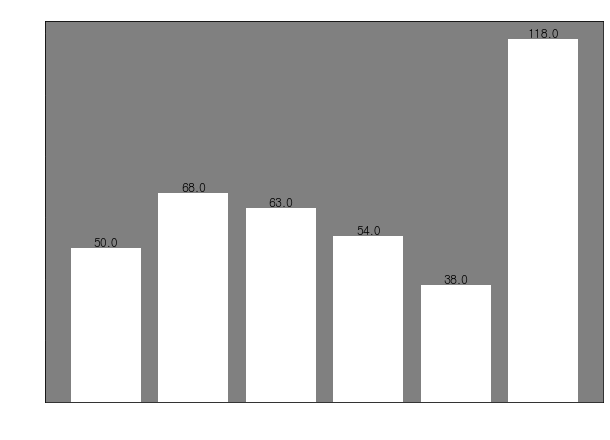

In [199]:
# Style 1
fig4, ax4 = plt.subplots(figsize=(10, 7))
plt.title('Style 1').set_color('white')
plt.xlabel('Style 1').set_color('white')
plt.ylabel('style1_counts').set_color('white')
ax4.tick_params(axis='x', colors="white")
ax4.tick_params(axis='y', colors="white")
ax4.set_facecolor('grey')
bar4 = ax4.bar(style1['Style 1'], style1['style1_counts'], color='white')

for rect in bar4:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)


In [201]:
# Style 2
style2 = villagers.groupby('Style 2').size().reset_index(name='style2_counts')
style2

,Style 2,style2_counts
0,Active,50
1,Cool,59
2,Cute,62
3,Elegant,56
4,Gorgeous,54
5,Simple,110


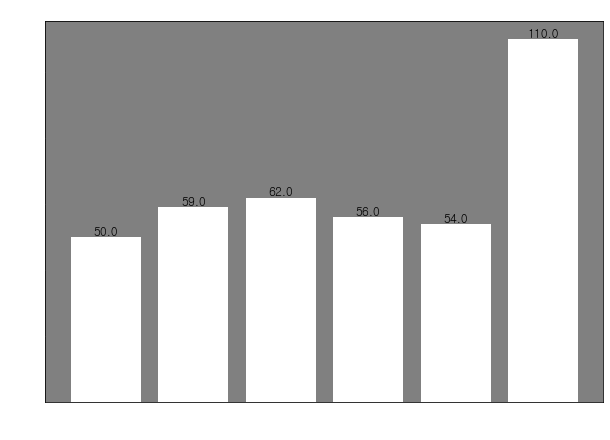

In [202]:
# Style 2
fig5, ax5 = plt.subplots(figsize=(10, 7))
plt.title('Style 2').set_color('white')
plt.xlabel('Style 2').set_color('white')
plt.ylabel('style2_counts').set_color('white')
ax5.tick_params(axis='x', colors="white")
ax5.tick_params(axis='y', colors="white")
ax5.set_facecolor('grey')
bar5 = ax5.bar(style2['Style 2'], style2['style2_counts'], color='white')

for rect in bar5:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)


In [112]:
# Style 1, 2 그룹핑
villagers.groupby(['Style 1', 'Style 2']).size().reset_index(name='styles_counts')

,Style 1,Style 2,sum_index
0,Active,Active,6
1,Active,Cool,10
2,Active,Cute,5
3,Active,Elegant,1
4,Active,Gorgeous,2
5,Active,Simple,26
6,Cool,Active,12
7,Cool,Cool,9
8,Cool,Elegant,8
9,Cool,Gorgeous,14


# Color

In [205]:
# Color 1
color1 = villagers.groupby('Color 1').size().reset_index(name='color1_counts')
color1

,Color 1,color1_counts
0,Beige,17
1,Black,47
2,Blue,46
3,Brown,15
4,Colorful,17
5,Gray,15
6,Green,44
7,Light blue,21
8,Orange,19
9,Pink,29


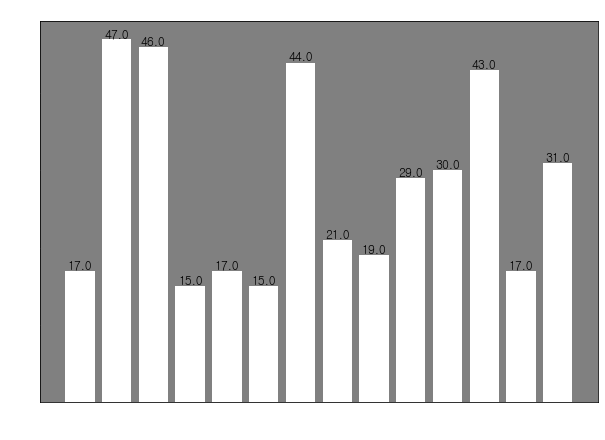

In [209]:
# Color 1
fig6, ax6 = plt.subplots(figsize=(10, 7))
plt.title('Color 1').set_color('white')
plt.xlabel('Color 1').set_color('white')
plt.ylabel('color1_counts').set_color('white')
ax6.tick_params(axis='x', colors="white")
ax6.tick_params(axis='y', colors="white")
ax6.set_facecolor('grey')
bar6 = ax6.bar(color1['Color 1'], color1['color1_counts'], color='white')

for rect in bar6:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)


In [210]:
# Color 2
color2 = villagers.groupby('Color 2').size().reset_index(name='color2_counts')
color2

,Color 2,color2_counts
0,Beige,18
1,Black,25
2,Blue,38
3,Brown,16
4,Colorful,17
5,Gray,29
6,Green,24
7,Light blue,21
8,Orange,22
9,Pink,24


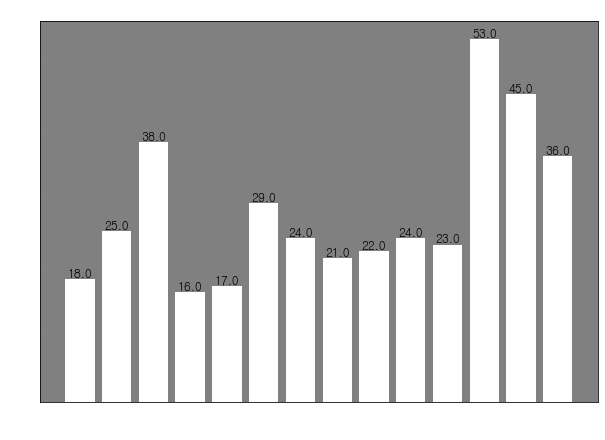

In [211]:
# Color 2
fig7, ax7 = plt.subplots(figsize=(10, 7))
plt.title('Color 2').set_color('white')
plt.xlabel('Color 2').set_color('white')
plt.ylabel('color2_counts').set_color('white')
ax7.tick_params(axis='x', colors="white")
ax7.tick_params(axis='y', colors="white")
ax7.set_facecolor('grey')
bar7 = ax7.bar(color2['Color 2'], color2['color2_counts'], color='white')

for rect in bar7:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)


In [213]:
# Color 1, 2
villagers.groupby(['Color 1', 'Color 2']).size().reset_index(name='colors_counts')

,Color 1,Color 2,colors_counts
0,Beige,Blue,1
1,Beige,Brown,4
2,Beige,Gray,1
3,Beige,Green,2
4,Beige,Orange,3
5,Beige,Red,2
6,Beige,White,2
7,Beige,Yellow,2
8,Black,Beige,1
9,Black,Black,1
